In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

# reflect the tables
HawaiiBase = automap_base()
# reflect the tables
HawaiiBase.prepare(engine, reflect= True)

/var/folders/kb/hzdl45tn52d2sj_2dt8x7_rm0000gn/T/ipykernel_28811/2452522875.py:6: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  HawaiiBase.prepare(engine, reflect= True)


In [6]:
# View all of the classes that automap found
# View all of the classes that automap found
HawaiiBase.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurementForHawaii = HawaiiBase.classes.measurement
stationForHawaii = HawaiiBase.classes.station

In [8]:
# Create our session (link) from Python to the DB
sessiontoDB = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = sessiontoDB.query(measurementForHawaii.date).\
    order_by(measurementForHawaii.date.desc()).first()

print(most_recent_date)

('2017-08-23',)


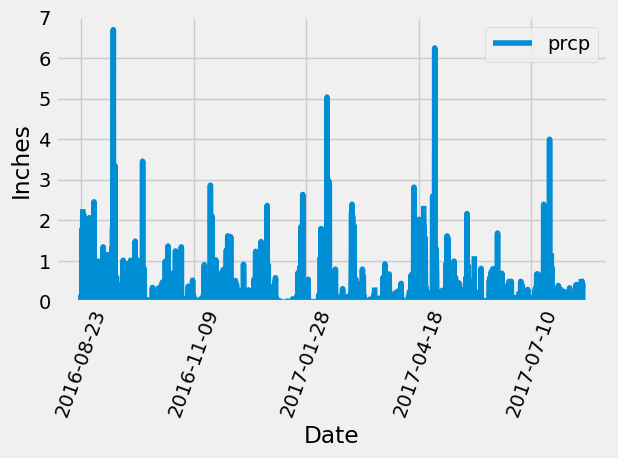

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

valuesforHawaii = sessiontoDB.query(measurementForHawaii.date, measurementForHawaii.prcp).\
    filter(measurementForHawaii.date > '2016-08-22').\
    order_by(measurementForHawaii.date).all()

# Calculate the date one year from the last date in data set.
valuesDataFrame = pd.DataFrame(valuesforHawaii)
valuesDataFrameIndex = valuesDataFrame.set_index("date")
valuesDataFrameIndex

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
valuesDataFrameIndex.plot()
plt.ylim(0,7)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
valuesDataFrameIndex.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
totalNumberHawaiiStations = sessiontoDB.query(stationForHawaii.station).count()
totalNumberHawaiiStations

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
totalNumberStatationsForHawaii = sessiontoDB.query(stationForHawaii.station).count()
totalNumberStatationsForHawaii
actiStations = sessiontoDB.query(measurementForHawaii.station,func.count(measurementForHawaii.station)).\
    order_by(func.count(measurementForHawaii.station).desc()).\
    group_by(measurementForHawaii.station).all() 

print(actiStations) 

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostActiStationForHawaii = sessiontoDB.query(measurementForHawaii.station,func.count(measurementForHawaii.station)).\
    order_by(func.count(measurementForHawaii.station).desc()).\
    group_by(measurementForHawaii.station).first()


mostActiNumber = mostActiStationForHawaii[0]
mostActiNumber 

lowestTempForHawaii = sessiontoDB.query(func.min(measurementForHawaii.tobs)).\
  filter(measurementForHawaii.station==mostActiNumber).all()
print(lowestTempForHawaii) 




highTempForHawaii = sessiontoDB.query(func.max(measurementForHawaii.tobs)).\
  filter(measurementForHawaii.station==mostActiNumber).all()

print(highTempForHawaii)

# Avg temperature for most active station
agTempForHawaii = sessiontoDB.query(func.avg(measurementForHawaii.tobs)).\
    filter(measurementForHawaii.station==mostActiNumber).all()

print(agTempForHawaii)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


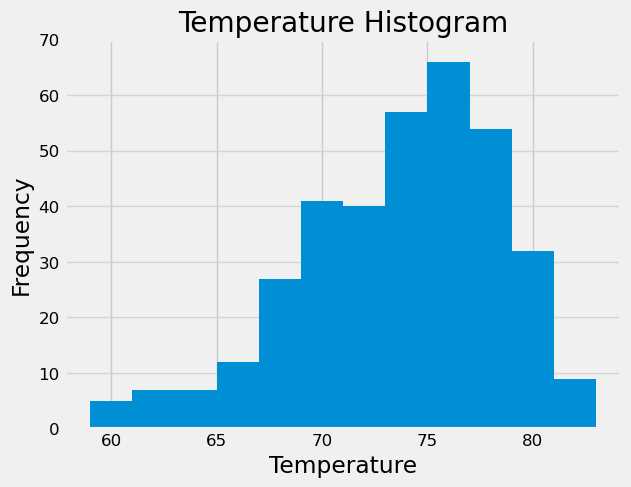

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
mostRecentStation = sessiontoDB.query(measurementForHawaii.date,measurementForHawaii.tobs).\
    filter(measurementForHawaii.station == mostActiNumber).\
    order_by(measurementForHawaii.date.desc()).first()


twelMonthValue = sessiontoDB.query(measurementForHawaii.date,measurementForHawaii.tobs).\
    filter(measurementForHawaii.station == mostActiNumber).\
    filter(measurementForHawaii.date > '2016-08-17').all()


twelMonthDataFrame = pd.DataFrame(twelMonthValue, columns=['date', 'tobs'])
twelMonthDataFrameTobs = twelMonthDataFrame['tobs']



hist = twelMonthDataFrameTobs.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Histogram')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Close Session

In [22]:
# Close Session
sessiontoDB.close()